# Pymaceuticals Inc.

## Analysis:

1. Capomulin was one of the most effective drugs against squamous cell carcinoma (SCC), particularly when compared to Ketapril. However, although Capomulin showed very promising results, Ramicane seemed to be more effective at treating SCC.
2. Neither the number of mice tested nor the sex of the mice had an effect on how well each drug performed.
3. About the four most promising drugs, Capomulin, Ramicane, Infubinol, and Ceftamin —*as defined by the company*—, the final tumour volumes of all the mice tested with Capomulin and Ramicane were consistently smaller than those of Infubional and Ceftamin.
4. Although Capomulin works, its tumour-shrinking effects might take time to show.
5. There is a significant relationship between mouse weight and tumour volume; both rise together.

***

## <font color=blue>1. Preparing the data:</font>

In [1]:
# Imported dependencies and setup:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Created the study data file's path:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results:
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combined the data into a single dataset:
merged_df = mouse_metadata_df.merge(study_results_df, how='right', on='Mouse ID')

# Reordered the columns and displayed the data table for preview:
merged_df = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex',
                       'Age_months', 'Weight (g)']]
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


***

In [2]:
# Checked the number of mice:
merged_df['Mouse ID'].nunique()

249

In [3]:
# Got the duplicated mice by ID number that showed up for Mouse ID and Timepoint:
duplicated_rows_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_mouse = duplicated_rows_df['Mouse ID'].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Got all the data for the duplicated mouse ID:
duplicated_mouse_data_df = merged_df.loc[merged_df['Mouse ID'] == 'g989']
duplicated_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Created a clean DataFrame by dropping the duplicate mouse by its ID:
clean_merged_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checked the number of mice in the clean DataFrame:
clean_merged_df['Mouse ID'].nunique()

248

***

## <font color=purple>2. Summary statistics:</font>

In [7]:
# Generated a summary statistics table of the mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen:

# Used the groupby and summary statistical methods to calculate the following properties of each drug regimen: mean,
# median, variance, standard deviation, and SEM of the tumor volume. Assembled the resulting series into a single
# summary DataFrame:
clean_merged_df_grouped_by_mean_tumor = clean_merged_df.groupby(['Drug Regimen']).mean(numeric_only=True)['Tumor Volume (mm3)']
clean_merged_df_grouped_by_median_tumor = clean_merged_df.groupby(['Drug Regimen']).median(numeric_only=True)['Tumor Volume (mm3)']
clean_merged_df_grouped_by_var_tumor = clean_merged_df.groupby(['Drug Regimen']).var(numeric_only=True)['Tumor Volume (mm3)']
clean_merged_df_grouped_by_std_tumor = clean_merged_df.groupby(['Drug Regimen']).std(numeric_only=True)['Tumor Volume (mm3)']
clean_merged_df_grouped_by_sem_tumor = clean_merged_df.groupby(['Drug Regimen']).sem(numeric_only=True)['Tumor Volume (mm3)']

summ_stats_grouped_df = pd.DataFrame({"Mean Tumor Volume": clean_merged_df_grouped_by_mean_tumor,
                                      "Median Tumor Volume": clean_merged_df_grouped_by_median_tumor,
                                      "Tumor Volume Variance": clean_merged_df_grouped_by_var_tumor,
                                      "Tumor Volume Std. Dev.": clean_merged_df_grouped_by_std_tumor,
                                      "Tumor Volume Std. Err.": clean_merged_df_grouped_by_sem_tumor})
summ_stats_grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generated a summary statistics table of the mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen:

# Used the aggregation method to produce the same summary statistics, as in the previous cell, in a single line:
summ_stats_agg_df = clean_merged_df.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean', 'median',
                                                                                                'var', 'std', 'sem']})
summ_stats_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

***

## <font color=blue>3. Bar and Pie Charts:</font>

<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

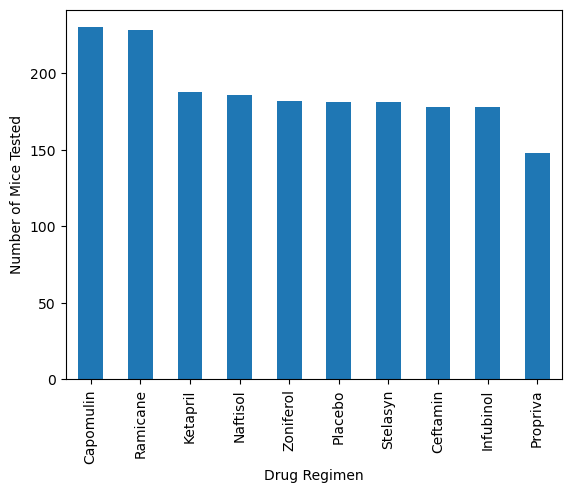

In [9]:
# Generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas:
clean_merged_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Number of Mice Tested')

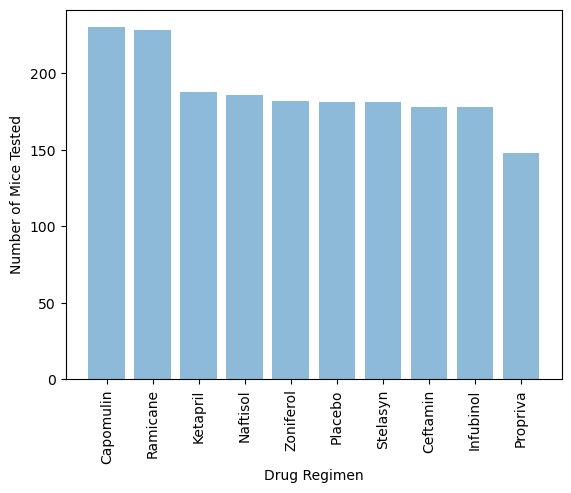

In [10]:
# Generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot:
total_number_timepoints_s = clean_merged_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(
    ascending=False)
x_axis_bar = np.arange(len(total_number_timepoints_s))
tick_locations_bar = [value for value in x_axis_bar]
plt.bar(x_axis_bar, total_number_timepoints_s, alpha=0.5, align='center')
plt.xticks(tick_locations_bar, total_number_timepoints_s.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

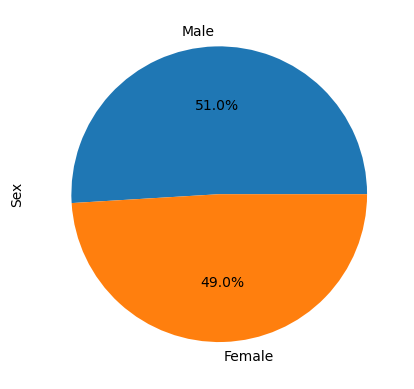

In [11]:
# Generated a pie plot showing the distribution of female versus male mice using Pandas:
clean_merged_df.groupby(['Sex']).count().sort_values(by='Mouse ID', ascending=False).plot(kind='pie',
                                                                                          y='Mouse ID',
                                                                                          legend=False,
                                                                                          ylabel='Sex',
                                                                                          autopct='%1.1f%%')
plt.show()

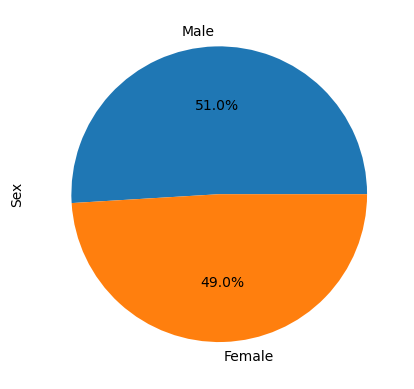

In [12]:
# Generated a pie plot showing the distribution of female versus male mice using pyplot:
sex_df = clean_merged_df.groupby(['Sex']).count().sort_values(by='Mouse ID', ascending=False)
labels_pie = sex_df.index
plt.pie(sex_df['Mouse ID'], labels=labels_pie, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

***

## <font color=purple>4. Quartiles, Outliers and Boxplots:</font>

In [13]:
# Calculated the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane,
# Infubinol, and Ceftamin.

# Started by getting the last (greatest) timepoint for each mouse:
greatest_timepoint_df = clean_merged_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merged this grouped df with the original DataFrame to get the tumor volume at the last timepoint:
last_timepoint_df = greatest_timepoint_df.merge(clean_merged_df, how='left', on= ['Mouse ID', 'Timepoint'])
last_timepoint_df.reset_index()
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put four of the treatments in a list that would be used to loop (and then for plotting labels):
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Created an empty list to fill with tumor vol data (for plotting):
tumor_vol_data_l = []

# Calculated the IQR and quantitatively determined if there were any potential outliers:
for drug in treatments:
    
    # Located the rows, which contained mice on each drug and got the tumor volumes:
    row_filter_s = last_timepoint_df['Drug Regimen'] == drug
    this_drug_tumor_vol_s = last_timepoint_df.loc[row_filter_s, 'Tumor Volume (mm3)']
    
    # Added a subset:
    tumor_vol_data_l.append(this_drug_tumor_vol_s)
    
    # Determined the outliers using upper and lower bounds:
    lowerq = this_drug_tumor_vol_s.quantile(.25)
    upperq = this_drug_tumor_vol_s.quantile(.75)
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    upper_outlier_filter_s = this_drug_tumor_vol_s > upper_bound
    lower_outlier_filter_s = this_drug_tumor_vol_s < lower_bound
    print(f"{drug}'s potential outliers: {this_drug_tumor_vol_s[lower_outlier_filter_s | upper_outlier_filter_s]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


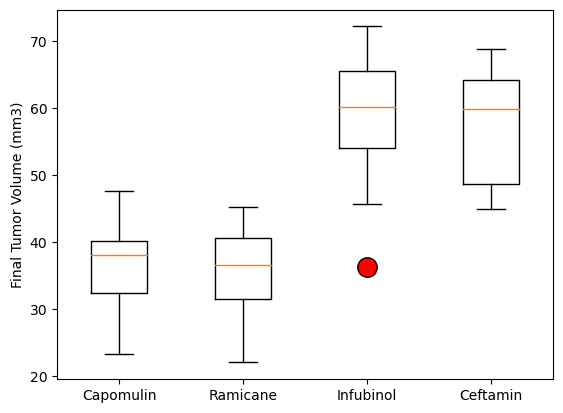

In [15]:
# Generated a box plot that shows the distrubution of the tumor volume for each treatment group:
fig1, ax1 = plt.subplots() 
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data_l, labels=treatments, flierprops=dict(markerfacecolor='red',
                                                                 markersize=14,
                                                                 markeredgecolor='black'))
plt.show()

***

## <font color=blue>5. Line and Scatter Plots:</font>

<AxesSubplot: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

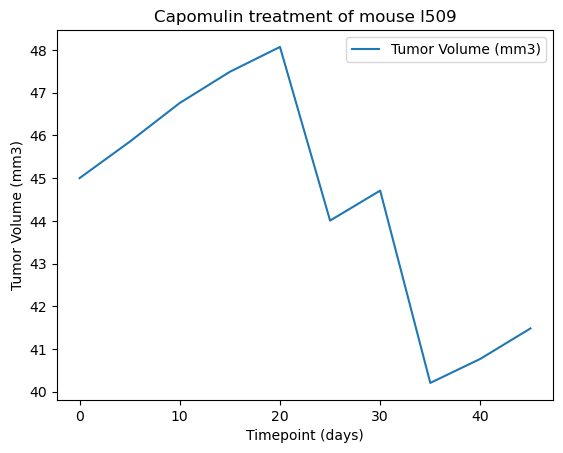

In [16]:
# Generated a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin:
mouse = 'l509'
clean_merged_by_mouse_df = clean_merged_df.loc[clean_merged_df['Mouse ID'] == mouse]
clean_merged_by_mouse_df.plot(x='Timepoint',
                              y='Tumor Volume (mm3)',
                              title=f'Capomulin treatment of mouse {mouse}',
                              xlabel='Timepoint (days)',
                              ylabel='Tumor Volume (mm3)')

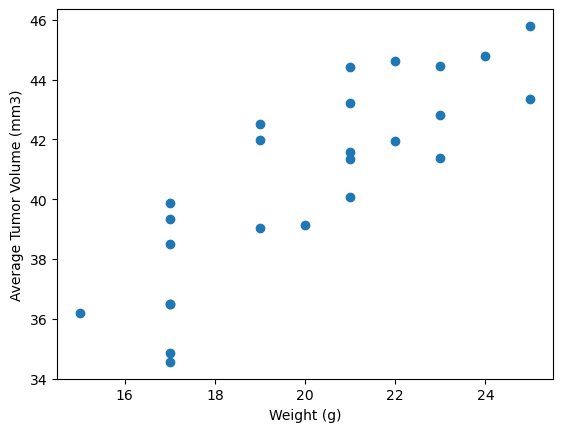

In [17]:
# Generated a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen:
drug_regimen = 'Capomulin'
clean_merged_by_regimen_df = clean_merged_df.loc[clean_merged_df['Drug Regimen'] == drug_regimen]
x_axis_scatter = clean_merged_by_regimen_df.groupby(['Mouse ID']).mean(numeric_only=True)['Weight (g)']
y_axis_scatter = clean_merged_by_regimen_df.groupby(['Mouse ID']).mean(numeric_only=True)['Tumor Volume (mm3)']

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

***

## <font color=purple>6. Correlation and Regression:</font>

The correlation between mouse weight and the average tumor volume is 0.84


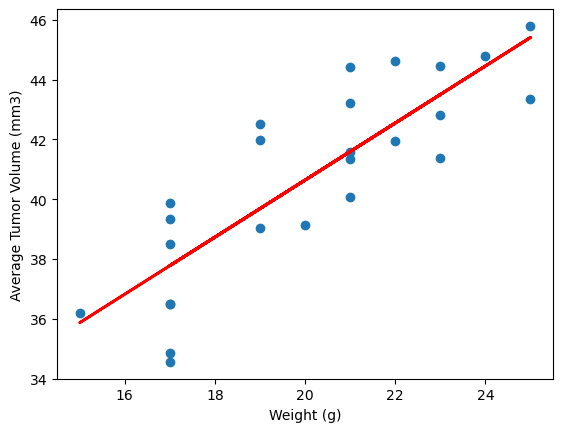

In [18]:
# Calculated the correlation coefficient and linear regression model for mouse weight and average tumor volume
# for the Capomulin regimen:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)
regress_values = slope * x_axis_scatter + intercept
plt.scatter(x_axis_scatter, y_axis_scatter)
plt.plot(x_axis_scatter, regress_values, 'r-', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
plt.show()